Test Code that takes in a pair of color+depth images and create a single pointcloud using open3d

In [1]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
color_raw = o3d.io.read_image("data/color120.jpg")
depth_raw = o3d.io.read_image("data/depth120.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
color_raw, depth_raw)

In [3]:
width, height = 264, 264
intrinsic_matrix = np.array([[952.828,     0.,     646.699 ],[0.,      952.828,     342.637 ], [0.,         0.,         1.  ]]) 
pinholeCamera = o3d.camera.PinholeCameraIntrinsic(width, height, intrinsic_matrix[0][0], intrinsic_matrix[1][1], intrinsic_matrix[0][2], intrinsic_matrix[1][2])
t = np.load('data/transformation_matrix120.npy')
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
            rgbd_image,
            pinholeCamera, 
            t
            )

np.asarray(pcd.points)

array([[0.86513025, 0.11843564, 0.50165717],
       [0.86511633, 0.11840145, 0.50157827],
       [0.86510241, 0.11836727, 0.50149937],
       ...,
       [0.84763316, 0.13150481, 0.4811364 ],
       [0.8476169 , 0.13146486, 0.48104419],
       [0.84760064, 0.1314249 , 0.48095198]])

Combine two point clouds captured from a wrist mounted robot camera

Create two point clouds

In [4]:
color_raw2 = o3d.io.read_image("data/color160.jpg")
depth_raw2 = o3d.io.read_image("data/depth160.png")
rgbd_image2 = o3d.geometry.RGBDImage.create_from_color_and_depth(
color_raw2, depth_raw2)

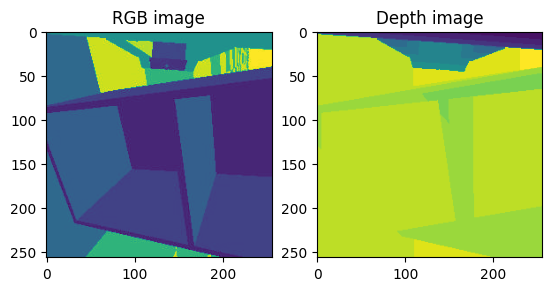

In [13]:
plt.subplot(1, 2, 1)
plt.title('RGB image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()

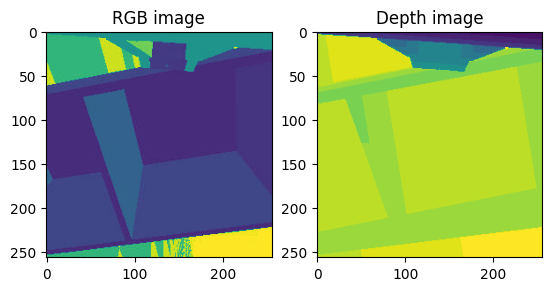

In [5]:
plt.subplot(1, 2, 1)
plt.title('RGB image')
plt.imshow(rgbd_image2.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image2.depth)
plt.show()

In [6]:
t2 = np.load('data/transformation_matrix160.npy')
pcd2 = o3d.geometry.PointCloud.create_from_rgbd_image(
            rgbd_image2,
            pinholeCamera,
            t2
            )

Convert with transformation matrix

In [11]:
print(t)
print(t2)

[[-0.15975629 -0.39244566 -0.90579486  0.58275467]
 [-0.93122944  0.36437773  0.00637153  0.72943632]
 [ 0.327551    0.84452073 -0.42366859 -0.08785924]
 [ 0.          0.          0.          1.        ]]
[[-0.17846392 -0.0037234  -0.98393941  0.63674835]
 [-0.89516555  0.41572282  0.16078922  0.62296178]
 [ 0.40844738  0.90948374 -0.07752458 -0.32656996]
 [ 0.          0.          0.          1.        ]]


In [12]:
o3d.visualization.draw_geometries([pcd, pcd2])

In [9]:
np.asarray(pcd.points)

array([[0.86513025, 0.11843564, 0.50165717],
       [0.86511633, 0.11840145, 0.50157827],
       [0.86510241, 0.11836727, 0.50149937],
       ...,
       [0.84763316, 0.13150481, 0.4811364 ],
       [0.8476169 , 0.13146486, 0.48104419],
       [0.84760064, 0.1314249 , 0.48095198]])

In [10]:
np.asarray(pcd2.points)

array([[0.87534962, 0.10369041, 0.5452341 ],
       [0.87533407, 0.10369008, 0.54514839],
       [0.87531852, 0.10368976, 0.54506268],
       ...,
       [0.86112922, 0.12768009, 0.53246312],
       [0.86111049, 0.1276797 , 0.53235986],
       [0.86109176, 0.12767931, 0.53225659]])